In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("OHLCNifty.csv", parse_dates=["date"], index_col="date")
data

,open,high,low,close,dayMovement
date,,,,,
2010-01-04,5201,5238,5167,5232,31
2010-01-05,5277,5288,5242,5278,46
2010-01-06,5278,5311,5260,5282,4
2010-01-07,5282,5303,5245,5263,-19
2010-01-08,5264,5277,5235,5245,-18
...,...,...,...,...,...
2022-07-13,16128,16140,15950,15967,-91
2022-07-14,16019,16071,15858,15939,-28
2022-07-15,16011,16067,15927,16049,110


In [3]:
data.drop('open',axis='columns', inplace=True)
data.drop('high',axis='columns', inplace=True)
data.drop('low',axis='columns', inplace=True)
data.drop('dayMovement',axis='columns', inplace=True)
data.head()

,close
date,
2010-01-04,5232
2010-01-05,5278
2010-01-06,5282
2010-01-07,5263
2010-01-08,5245


In [4]:
sma_s = 50
sma_l = 200
data["SMA_S"] = data.close.rolling(sma_s).mean()
data["SMA_L"] = data.close.rolling(sma_l).mean()
data

,close,SMA_S,SMA_L
date,,,
2010-01-04,5232,NaN,NaN
2010-01-05,5278,NaN,NaN
2010-01-06,5282,NaN,NaN
2010-01-07,5263,NaN,NaN
2010-01-08,5245,NaN,NaN
...,...,...,...
2022-07-13,15967,16048.76,17099.09
2022-07-14,15939,16033.88,17089.52
2022-07-15,16049,16026.64,17080.49


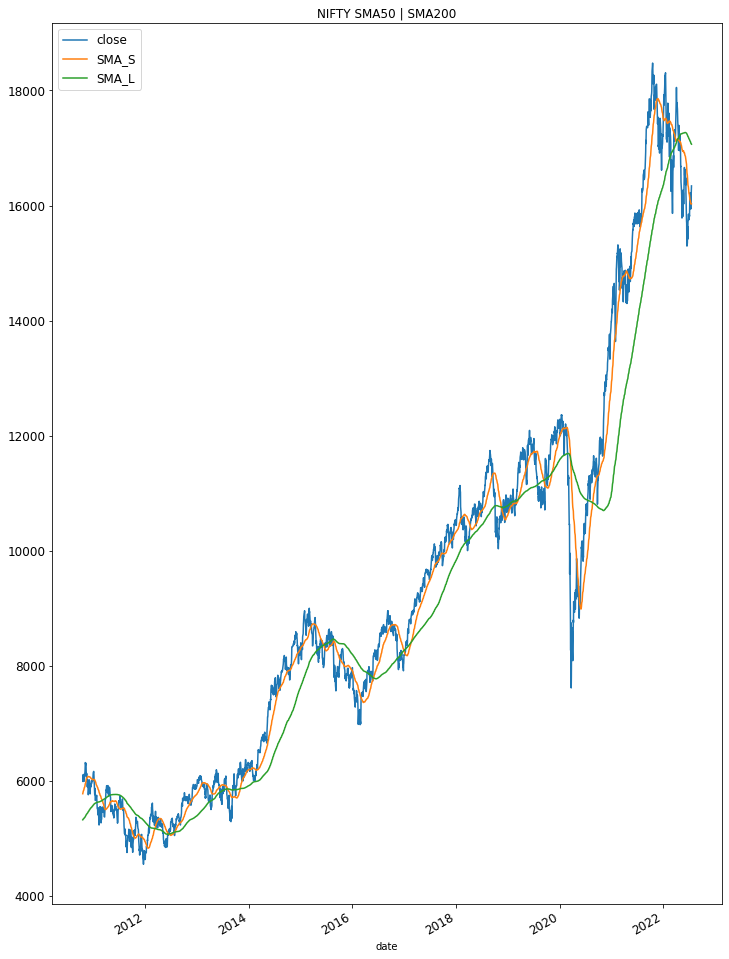

In [5]:
data.dropna(inplace=True)
data.plot(figsize=(12,18), title="NIFTY SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()

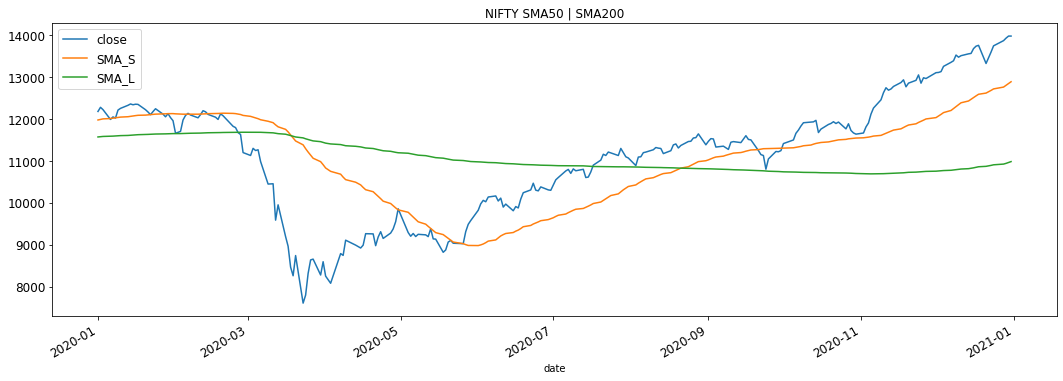

In [6]:
data.loc["2020"].plot(figsize=(18,6), title="NIFTY SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.legend(fontsize=12)
plt.show()


In [7]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
data

,close,SMA_S,SMA_L,position
date,,,,
2010-10-18,6076,5770.18,5316.465,1
2010-10-19,6027,5781.00,5320.440,1
2010-10-20,5982,5791.42,5323.960,1
2010-10-21,6102,5805.04,5328.060,1
2010-10-22,6066,5818.04,5332.075,1
...,...,...,...,...
2022-07-13,15967,16048.76,17099.090,-1
2022-07-14,15939,16033.88,17089.520,-1
2022-07-15,16049,16026.64,17080.490,-1


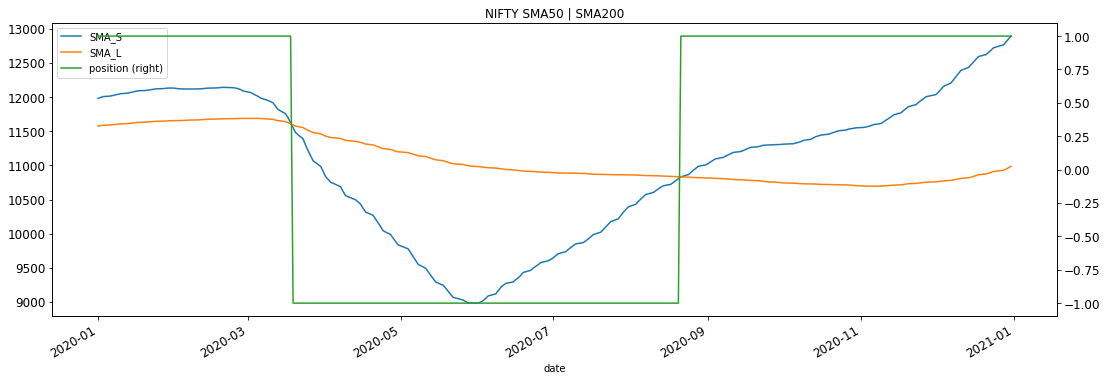

In [8]:
data.loc["2020",["SMA_S", "SMA_L", "position"]].plot(figsize=(18,6), secondary_y="position", fontsize="12", title="NIFTY SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [9]:
data["returns"] = np.log(data.close.div(data.close.shift(1)))
data

,close,SMA_S,SMA_L,position,returns
date,,,,,
2010-10-18,6076,5770.18,5316.465,1,NaN
2010-10-19,6027,5781.00,5320.440,1,-0.008097
2010-10-20,5982,5791.42,5323.960,1,-0.007494
2010-10-21,6102,5805.04,5328.060,1,0.019862
2010-10-22,6066,5818.04,5332.075,1,-0.005917
...,...,...,...,...,...
2022-07-13,15967,16048.76,17099.090,-1,-0.005683
2022-07-14,15939,16033.88,17089.520,-1,-0.001755
2022-07-15,16049,16026.64,17080.490,-1,0.006878


In [10]:
data["strategy"] = data.position.shift(1) * data.returns
data.dropna(inplace=True)
data

,close,SMA_S,SMA_L,position,returns,strategy
date,,,,,,
2010-10-19,6027,5781.00,5320.440,1,-0.008097,-0.008097
2010-10-20,5982,5791.42,5323.960,1,-0.007494,-0.007494
2010-10-21,6102,5805.04,5328.060,1,0.019862,0.019862
2010-10-22,6066,5818.04,5332.075,1,-0.005917,-0.005917
2010-10-25,6106,5831.12,5336.380,1,0.006572,0.006572
...,...,...,...,...,...,...
2022-07-13,15967,16048.76,17099.090,-1,-0.005683,0.005683
2022-07-14,15939,16033.88,17089.520,-1,-0.001755,0.001755
2022-07-15,16049,16026.64,17080.490,-1,0.006878,-0.006878


Absolute Performance

In [11]:
data[["returns", "strategy"]].sum()

returns     0.989331
strategy   -0.257242
dtype: float64

In [12]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     2.689434
strategy    0.773181
dtype: float64

Annualized Returns

In [13]:
data[["returns", "strategy"]].mean() * 252

returns     0.085556
strategy   -0.022246
dtype: float64

Annualized Risk

In [14]:
data[["returns", "strategy"]].std() * np.sqrt(252) #Risk

returns     0.175766
strategy    0.175844
dtype: float64

Cummulative Returns

In [15]:
data["cm_returns"] = data["returns"].cumsum().apply(np.exp)
data["cm_strategy"] = data["strategy"].cumsum().apply(np.exp)
data

,close,SMA_S,SMA_L,position,returns,strategy,cm_returns,cm_strategy
date,,,,,,,,
2010-10-19,6027,5781.00,5320.440,1,-0.008097,-0.008097,0.991935,0.991935
2010-10-20,5982,5791.42,5323.960,1,-0.007494,-0.007494,0.984529,0.984529
2010-10-21,6102,5805.04,5328.060,1,0.019862,0.019862,1.004279,1.004279
2010-10-22,6066,5818.04,5332.075,1,-0.005917,-0.005917,0.998354,0.998354
2010-10-25,6106,5831.12,5336.380,1,0.006572,0.006572,1.004937,1.004937
...,...,...,...,...,...,...,...,...
2022-07-13,15967,16048.76,17099.090,-1,-0.005683,0.005683,2.627880,0.791291
2022-07-14,15939,16033.88,17089.520,-1,-0.001755,0.001755,2.623272,0.792681
2022-07-15,16049,16026.64,17080.490,-1,0.006878,-0.006878,2.641376,0.787248


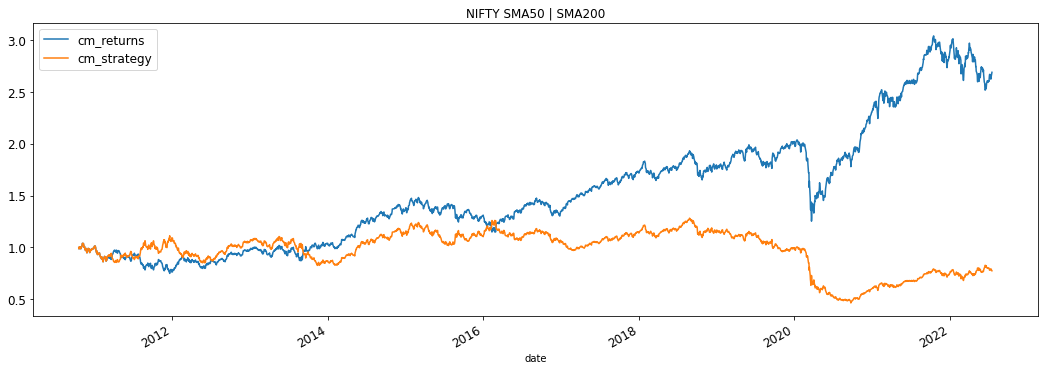

In [16]:
data.loc[:,["cm_returns", "cm_strategy"]].plot(figsize=(18,6), fontsize=12, title="NIFTY SMA{} | SMA{}".format(sma_s, sma_l))
plt.legend(fontsize=12)
plt.show()

In [17]:
out_perf = data["cm_strategy"].iloc[-1] - data["cm_returns"].iloc[-1]
out_perf

-1.9162529022145316